In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as shc

In [2]:
%store -r df

In [3]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


### Hierarchical Clustering

In [4]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


### *i. Determine optimal number of clusters using Dendogram*

### Clustering based on Age and Spending Score- x1

In [5]:
x1 = df.iloc[:,[1,3]]
x1

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


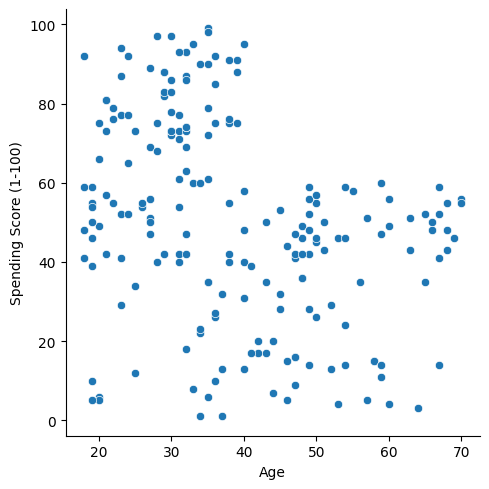

In [6]:
sns.relplot(x='Age', y="Spending Score (1-100)", data=x1)


In [7]:
#identify optimal number of clusters using Dendogram
#A dendrogram is a tree-like diagram that records the sequences of merges or splits.

# plt.title("dendogram")
# dendogram = shc.dendrogram(shc.linkage(x1, method = "ward"))


In [8]:

import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
# There are four methods for combining clusters in agglomerative approach.
# Ward’s method says that the distance between two clusters, A and B, is how much the sum of squares will increase when we merge them

hc_ward = linkage(y=x1, method='ward')
hc_complete = linkage(y=x1, method='complete')
hc_avg = linkage(y=x1, method='average')
hc_single = linkage(y=x1, method='single')



{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [35.0, 35.0, 52.5, 52.5],
  [12.5, 12.5, 43.75, 43.75],
  [75.0, 75.0, 85.0, 85.0],
  [95.0, 95.0, 105.0, 105.0],
  [125.0, 125.0, 135.0, 135.0],
  [115.0, 115.0, 130.0, 130.0],
  [100.0, 100.0, 122.5, 122.5],
  [80.0, 80.0, 111.25, 111.25],
  [28.125, 28.125, 95.625, 95.625],
  [155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [175.0, 175.0, 192.5, 192.5],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [265.0, 265.0, 275.0, 275.0],
  [255.0, 255.0, 270.0, 270.0],
  [245.0, 245.0, 262.5, 262.5],
  [222.5, 222.5, 253.75, 253.75],
  [183.75, 183.75, 238.125, 238.125],
  [152.5, 152.5, 210.9375, 210.9375],
  [61.875, 61.875, 181.71875, 181.71875],
  [295.0, 295.0, 305.0, 305.0],
  [285.0, 285.0, 300.0, 300.0],
  [325.0, 325.0, 335.0, 335.0],
  [315.0, 315.0, 330.0, 330.0],


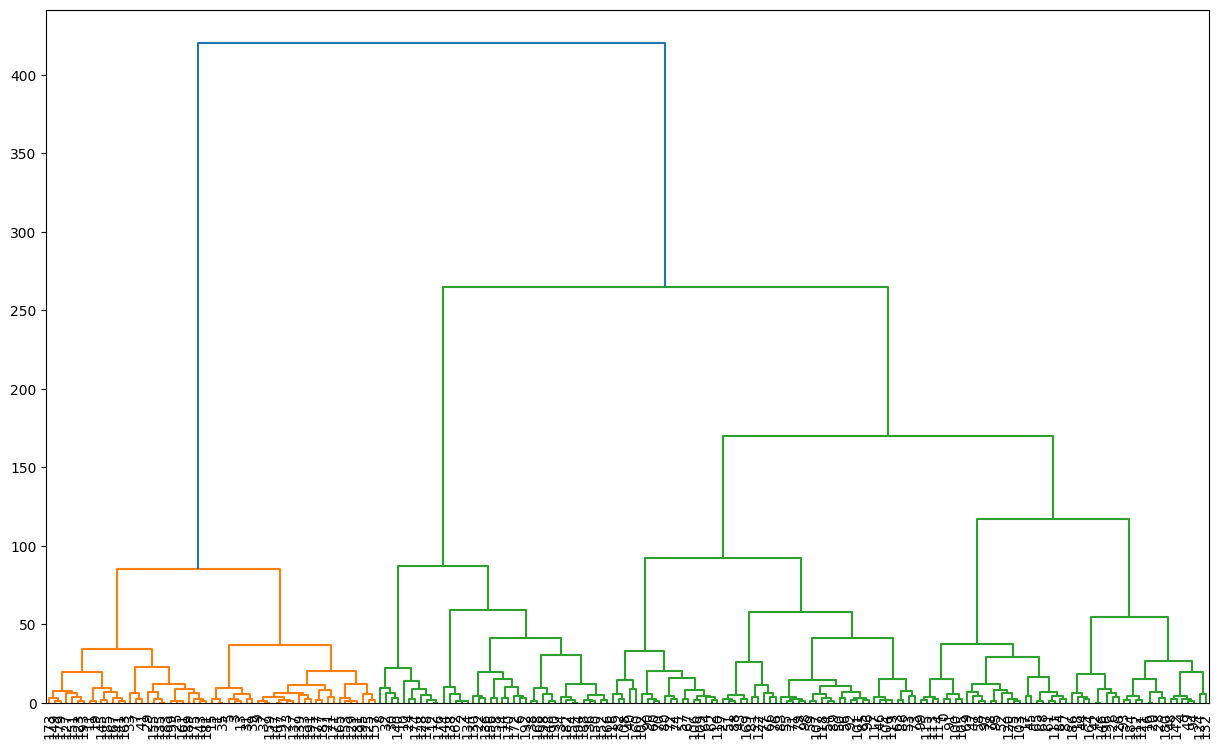

In [9]:
plt.figure(figsize=(15,9))
dendrogram(hc_ward, leaf_font_size=10)

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [45.0, 45.0, 55.0, 55.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [65.0, 65.0, 82.5, 82.5],
  [50.0, 50.0, 73.75, 73.75],
  [35.0, 35.0, 61.875, 61.875],
  [25.0, 25.0, 48.4375, 48.4375],
  [10.0, 10.0, 36.71875, 36.71875]],
 'dcoord': [[0.0, 6.324555320336759, 6.324555320336759, 0.0],
  [0.0, 6.324555320336759, 6.324555320336759, 0.0],
  [0.0, 6.324555320336759, 6.324555320336759, 0.0],
  [0.0, 6.324555320336759, 6.324555320336759, 6.324555320336759],
  [0.0, 6.708203932499369, 6.708203932499369, 6.324555320336759],
  [6.324555320336759,
   7.0710678118654755,
   7.0710678118654755,
   6.708203932499369],
  [0.0, 7.211102550927978, 7.211102550927978, 7.0710678118654755],
  [0.0, 8.0, 8.0, 7.211102550927978],
  [6.324555320336759, 8.94427190999916, 8.94427190999916, 8.0]],
 'ivl': ['144',
  '(4)',
  '10',
  '160',
  '(4)',
  '(25)',
  '(2)',
  '(66)',
  '40',
  '(95)'],
 'leaves': [144, 364, 10, 160, 363, 386, 385, 389, 40, 388],


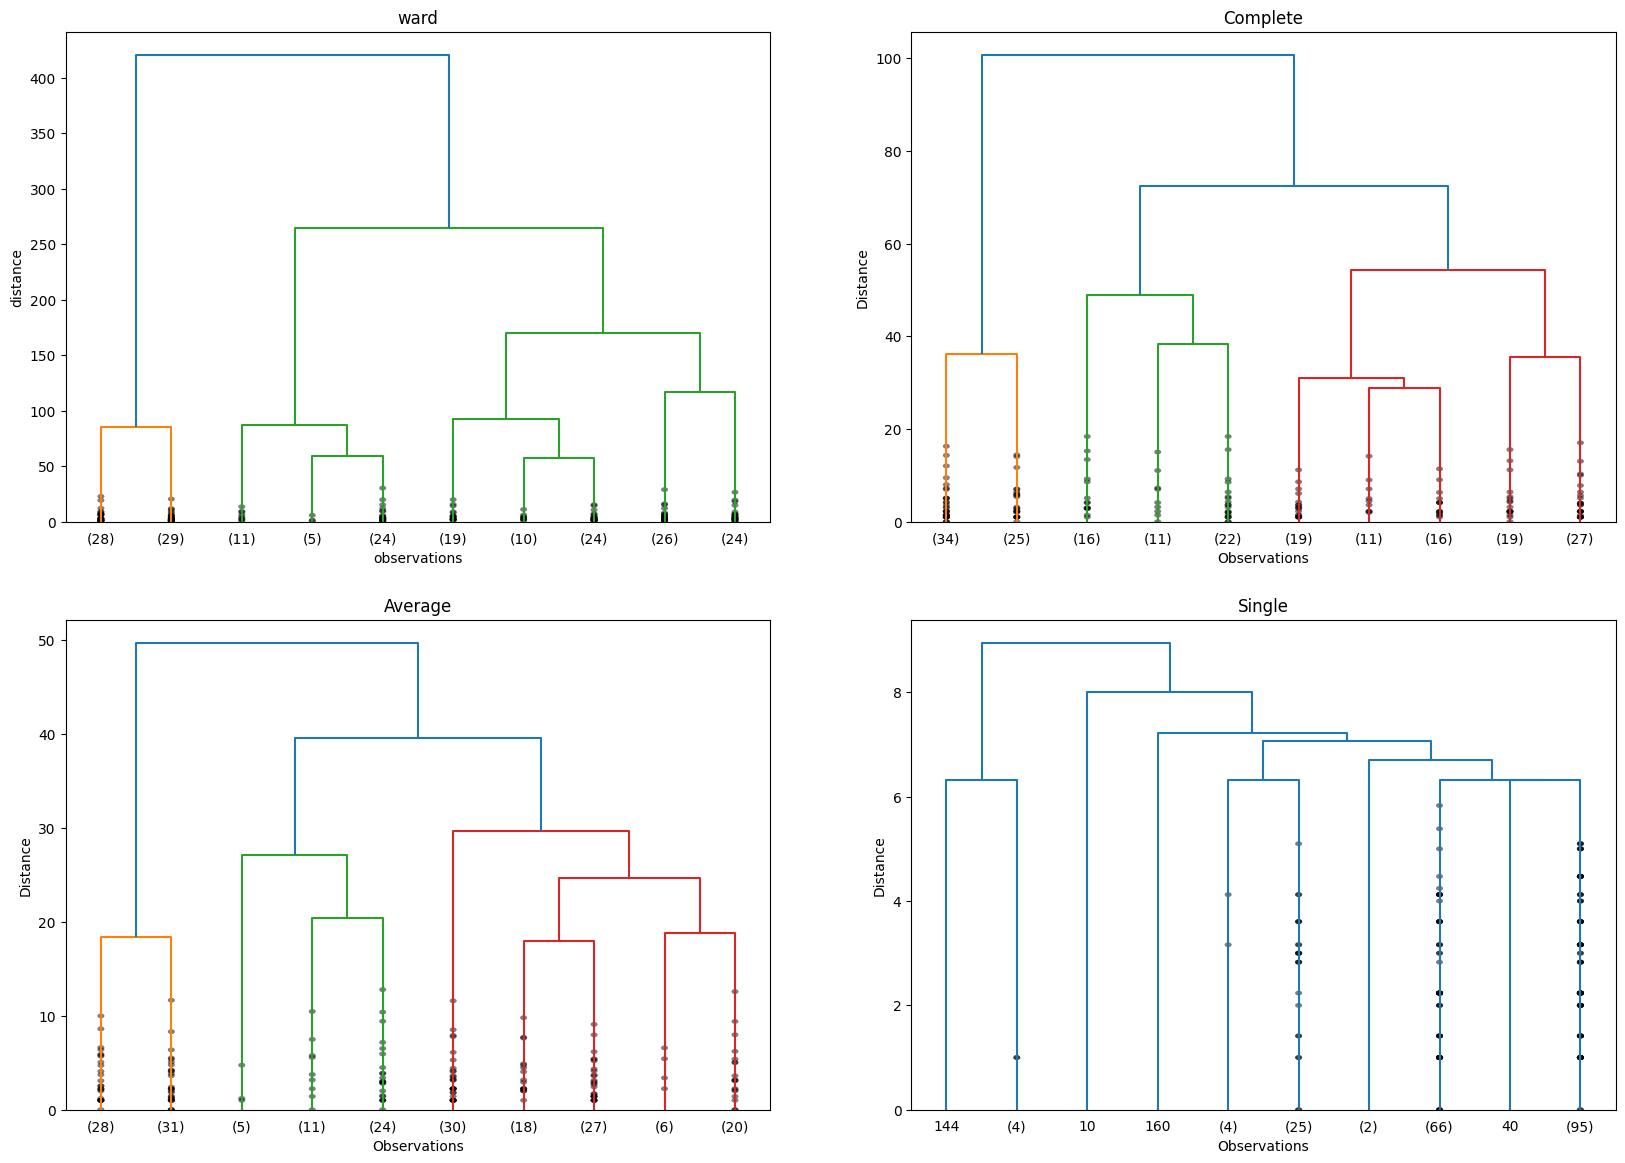

In [10]:
plt.figure(figsize=(20, 14))

plt.subplot(221)
plt.title('ward')
plt.xlabel('observations')
plt.ylabel('distance')
dendrogram(hc_ward, truncate_mode="lastp", p=10, show_contracted=True, leaf_font_size=10)


plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_avg, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, show_contracted = True,  leaf_font_size = 10)


{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [85.0, 85.0, 95.0, 95.0],
  [62.5, 62.5, 90.0, 90.0],
  [32.5, 32.5, 76.25, 76.25],
  [10.0, 10.0, 54.375, 54.375]],
 'dcoord': [[0.0, 85.17172154067977, 85.17172154067977, 0.0],
  [0.0, 59.18553042335814, 59.18553042335814, 0.0],
  [0.0, 86.82858568199791, 86.82858568199791, 59.18553042335814],
  [0.0, 57.577381860942445, 57.577381860942445, 0.0],
  [0.0, 92.2735540962843, 92.2735540962843, 57.577381860942445],
  [0.0, 117.31371266602714, 117.31371266602714, 0.0],
  [92.2735540962843,
   169.70614415940145,
   169.70614415940145,
   117.31371266602714],
  [86.82858568199791,
   264.65177587160457,
   264.65177587160457,
   169.70614415940145],
  [85.17172154067977,
   420.4853487043677,
   420.4853487043677,
   264.65177587160457]],
 'ivl': ['(28)',
  '(29)',
  '(11)',
  '(5)',
  '(24)',
  '(19)',
  '(10)',
  '(24)',
  '(26)',
  '(24)'],

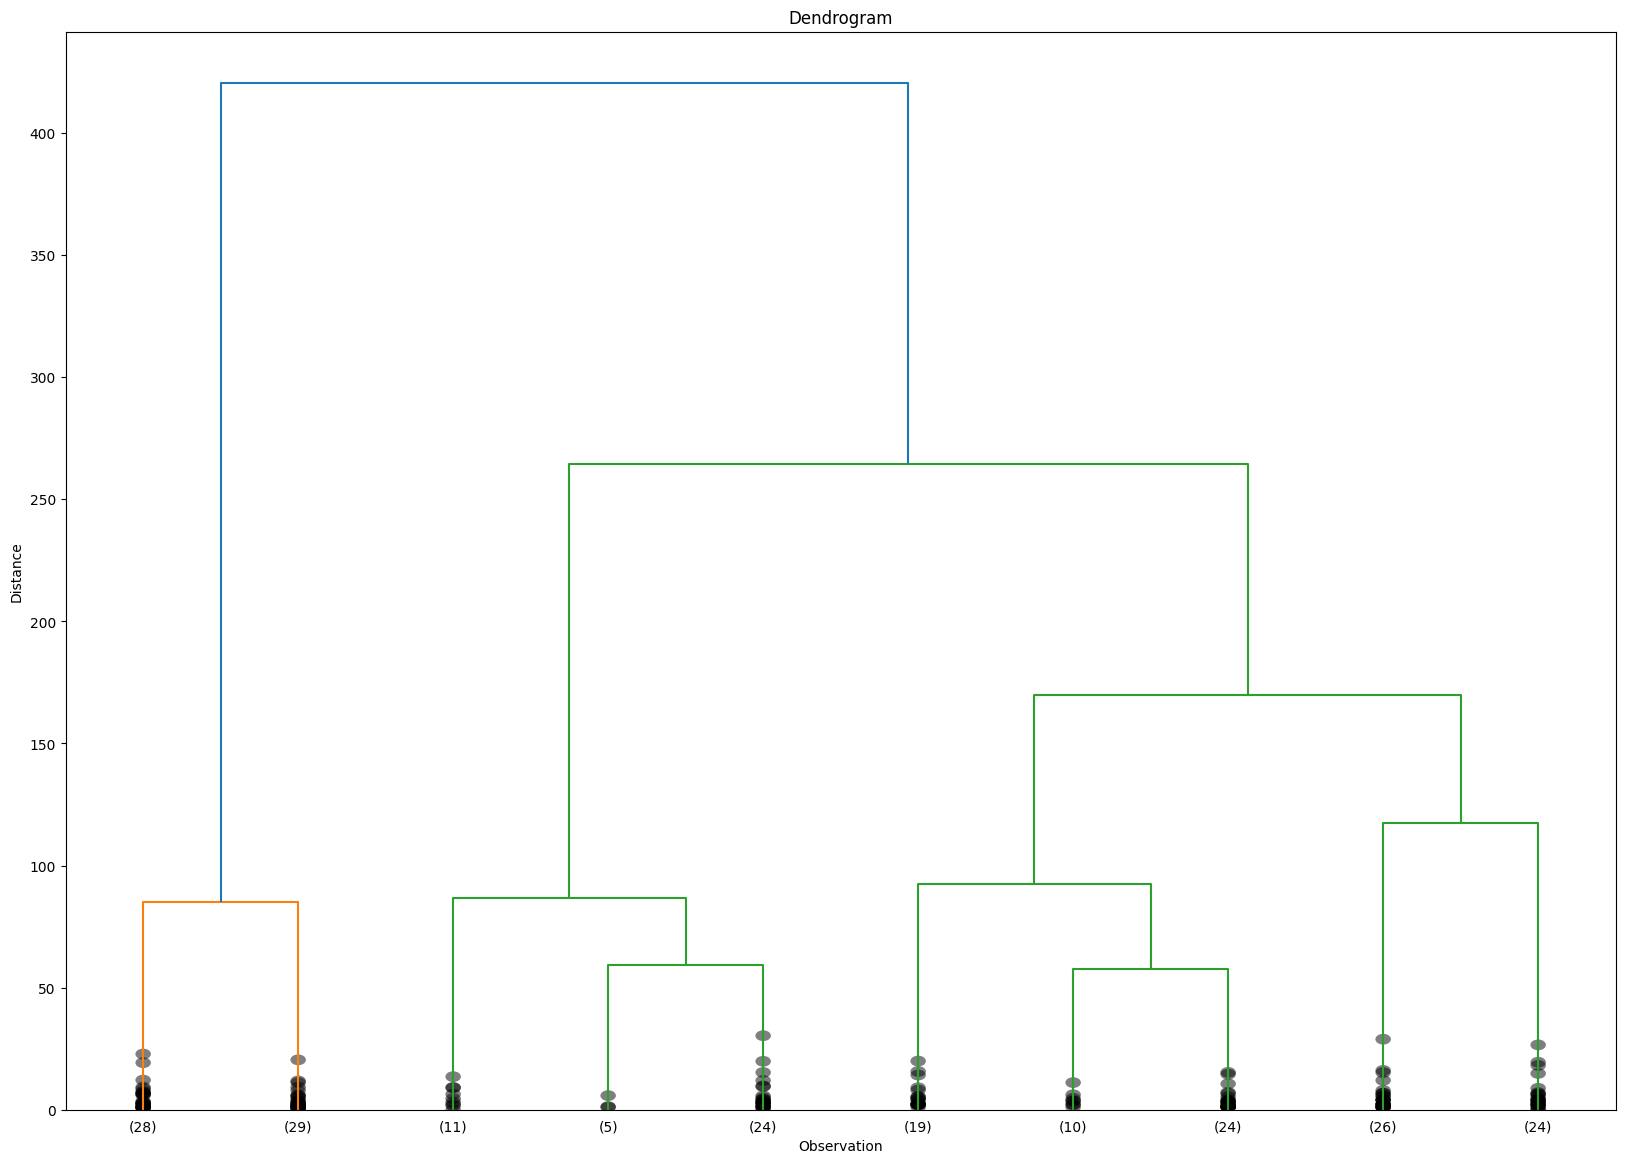

In [11]:
plt.figure(figsize=(20, 14))
plt.title('Dendrogram')
plt.xlabel('Observation')
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode='lastp', p=10,  show_contracted = True, leaf_font_size=10 )


In [12]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

K = range(2,11)
for k in K:
    agg_model = AgglomerativeClustering(n_clusters=k)
    agg_model.fit_predict(x1)
    print(f'The silhouette Score of {k} clusters: {silhouette_score(x1, agg_model.labels_)}')


The silhouette Score of 2 clusters: 0.4549465643222241
The silhouette Score of 3 clusters: 0.4411791686353356
The silhouette Score of 4 clusters: 0.4602496389565028
The silhouette Score of 5 clusters: 0.40374071753059787
The silhouette Score of 6 clusters: 0.4125958704145705
The silhouette Score of 7 clusters: 0.4158977524079244
The silhouette Score of 8 clusters: 0.3883688959732531
The silhouette Score of 9 clusters: 0.3948151533262091
The silhouette Score of 10 clusters: 0.3876666104778445


In [13]:
#As we can see high silhouette Score of cluster 4 is 0.46 

#### Age and Spending Score- x1

In [14]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
cluster = model.fit_predict(x1)
cluster

c:\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 0, 0, 3, 0, 3,
       2, 3, 2, 3, 0, 1, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 3, 0, 3, 0, 3, 2, 3, 2, 3,
       0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 0, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 0, 3, 2, 3, 0, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3,
       2, 3], dtype=int64)

In [15]:
x1["cluster"] = cluster
x1["cluster"]
x1.head()

C:\Users\hessa\AppData\Local\Temp\ipykernel_4288\1351358533.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x1["cluster"] = cluster


,Age,Spending Score (1-100),cluster
0,19,39,0
1,21,81,3
2,20,6,2
3,23,77,3
4,31,40,0


In [16]:
from sklearn.metrics import silhouette_score 
silhouette_score(x1, cluster)

0.46147471339798707

## Clustering based on Annual Income and Spending Score- x2

In [17]:
x2 = df.iloc[:,[2,3]]
x2

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


Text(0.5, 1.0, 'Dendrogram')

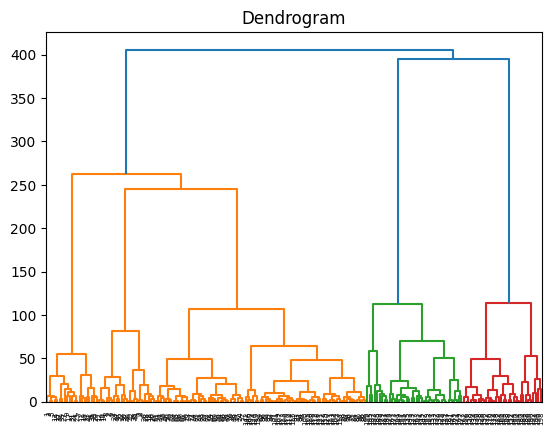

In [18]:
dendogram = shc.dendrogram(shc.linkage(x2, method = "ward"))
plt.title('Dendrogram')

In [19]:
hc_ward = linkage(y=x2, method='ward')
hc_complete = linkage(y=x2, method='complete')
hc_avg = linkage(y=x2, method='average')
hc_single = linkage(y=x2, method='single')


{'icoord': [[35.0, 35.0, 45.0, 45.0],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [40.0, 40.0, 62.5, 62.5],
  [85.0, 85.0, 95.0, 95.0],
  [51.25, 51.25, 90.0, 90.0],
  [25.0, 25.0, 70.625, 70.625],
  [15.0, 15.0, 47.8125, 47.8125],
  [5.0, 5.0, 31.40625, 31.40625]],
 'dcoord': [[0.0, 11.661903789690601, 11.661903789690601, 0.0],
  [0.0, 11.661903789690601, 11.661903789690601, 0.0],
  [0.0, 13.038404810405298, 13.038404810405298, 11.661903789690601],
  [11.661903789690601,
   13.341664064126334,
   13.341664064126334,
   13.038404810405298],
  [0.0, 13.416407864998739, 13.416407864998739, 0.0],
  [13.341664064126334,
   13.45362404707371,
   13.45362404707371,
   13.416407864998739],
  [0.0, 13.892443989449804, 13.892443989449804, 13.45362404707371],
  [0.0, 14.212670403551895, 14.212670403551895, 13.892443989449804],
  [0.0, 14.866068747318506, 14.866068747318506, 14.212670403551895]],
 'ivl': ['198',
  '199',
  '(2)',
  '(3)',
  '(154)',
  '(2)',
  '193',
  '(33)',
  '19

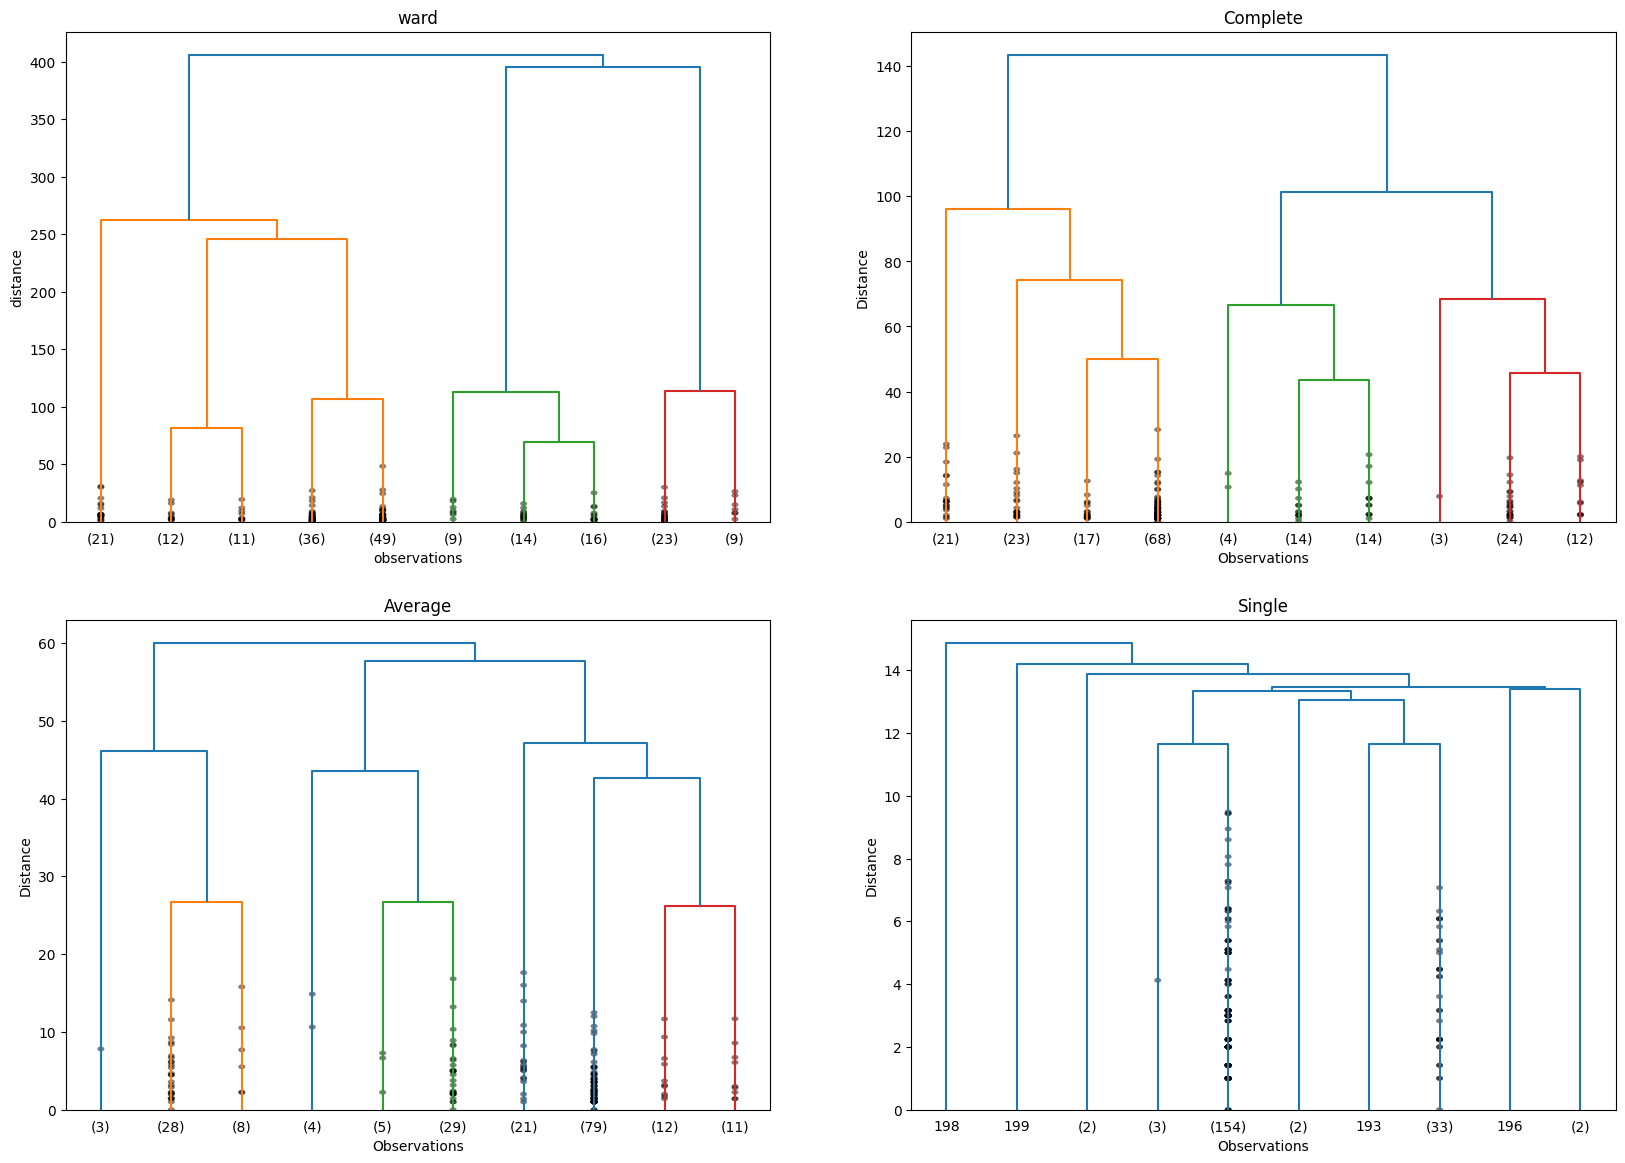

In [20]:
plt.figure(figsize=(20, 14))

plt.subplot(221)
plt.title('ward')
plt.xlabel('observations')
plt.ylabel('distance')
dendrogram(hc_ward, truncate_mode="lastp", p=10, show_contracted=True, leaf_font_size=10)


plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_avg, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, show_contracted = True,  leaf_font_size = 10)


{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [35.0, 35.0, 45.0, 45.0],
  [20.0, 20.0, 40.0, 40.0],
  [5.0, 5.0, 30.0, 30.0],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [85.0, 85.0, 95.0, 95.0],
  [62.5, 62.5, 90.0, 90.0],
  [17.5, 17.5, 76.25, 76.25]],
 'dcoord': [[0.0, 81.17935866982934, 81.17935866982934, 0.0],
  [0.0, 106.65057883130635, 106.65057883130635, 0.0],
  [81.17935866982934,
   245.65460099007137,
   245.65460099007137,
   106.65057883130635],
  [0.0, 262.5626341044318, 262.5626341044318, 245.65460099007137],
  [0.0, 69.52315475882152, 69.52315475882152, 0.0],
  [0.0, 112.81820335631572, 112.81820335631572, 69.52315475882152],
  [0.0, 113.88601651850901, 113.88601651850901, 0.0],
  [112.81820335631572,
   394.85965759553204,
   394.85965759553204,
   113.88601651850901],
  [262.5626341044318,
   405.6600410421901,
   405.6600410421901,
   394.85965759553204]],
 'ivl': ['(21)',
  '(12)',
  '(11)',
  '(36)',
  '(49)',
  '(9)',
  '(14)',
  '(16)',
  '(23)',
  '(9)']

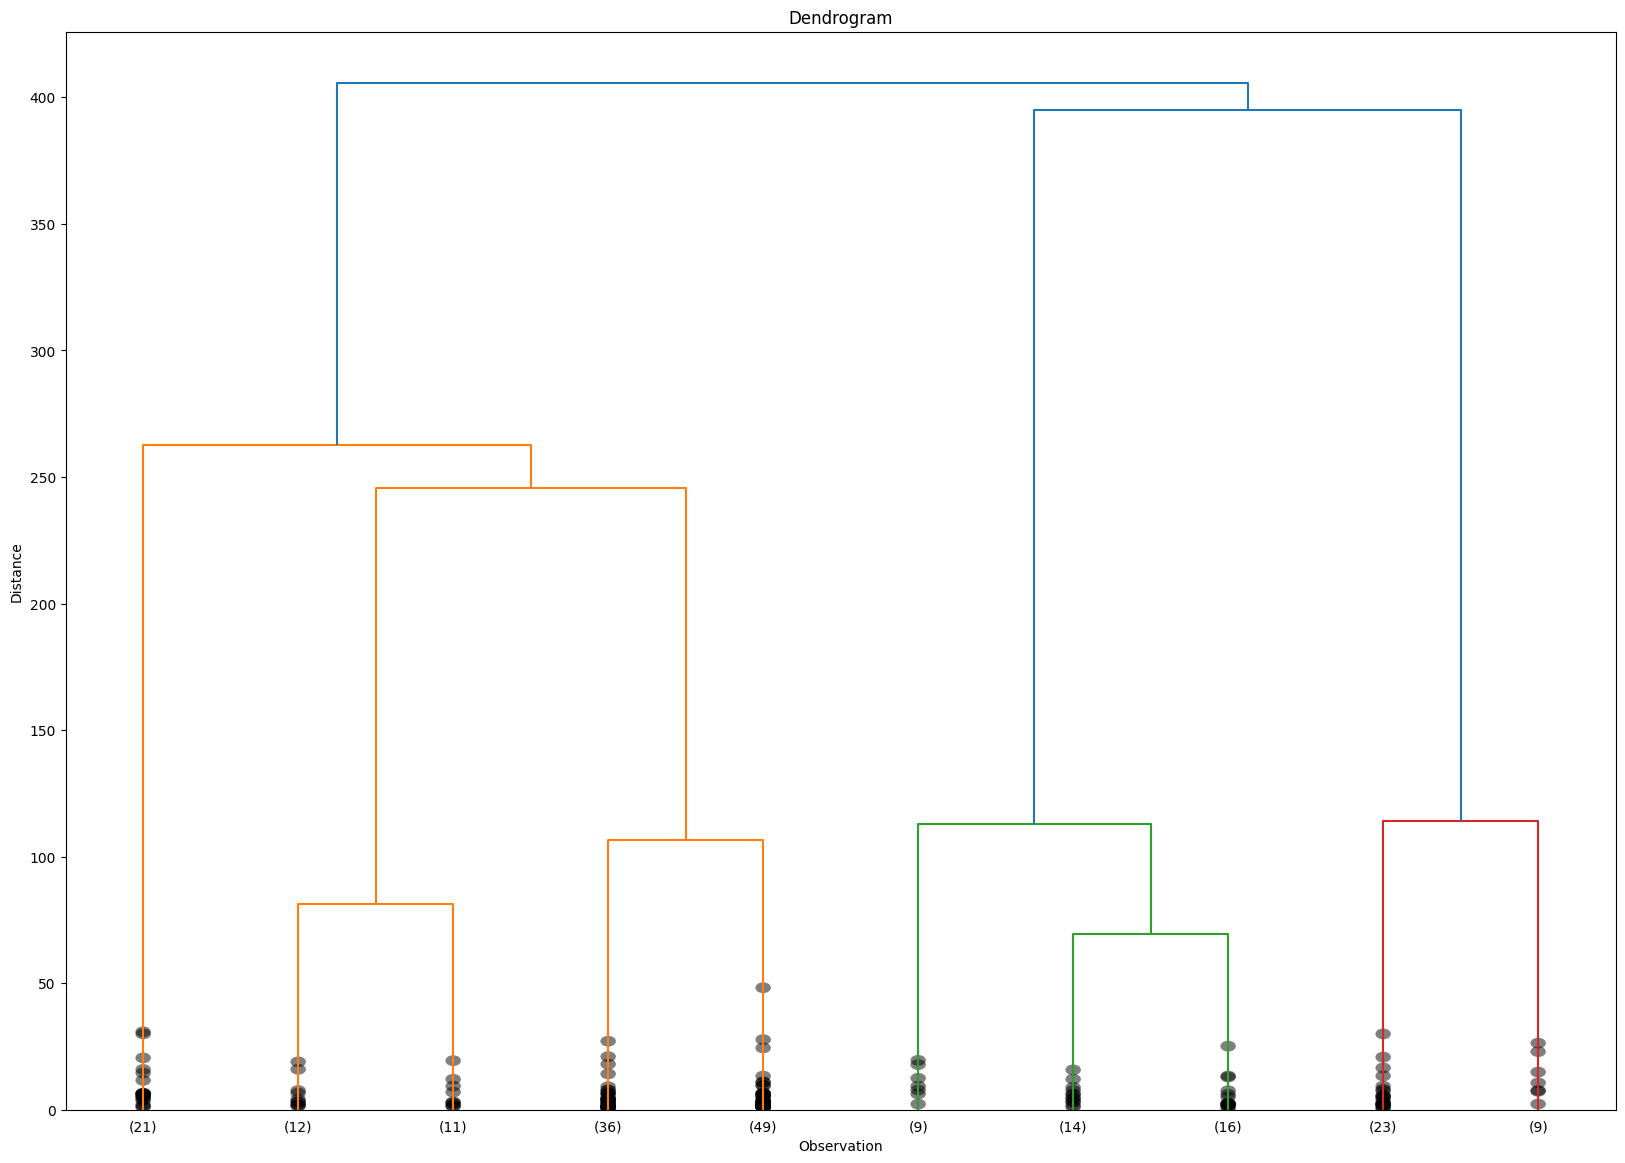

In [21]:
plt.figure(figsize=(20, 14))
plt.title('Dendrogram')
plt.xlabel('Observation')
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode='lastp', p=10,  show_contracted = True, leaf_font_size=10 )


In [22]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

K = range(2,11)
for k in K:
    agg_model = AgglomerativeClustering(n_clusters=k)
    agg_model.fit_predict(x2)
    print(f'The silhouette Score of {k} clusters: {silhouette_score(x2, agg_model.labels_)}')


The silhouette Score of 2 clusters: 0.36706444723912895
The silhouette Score of 3 clusters: 0.4618340266628975
The silhouette Score of 4 clusters: 0.4916598193892782
The silhouette Score of 5 clusters: 0.5529945955148897
The silhouette Score of 6 clusters: 0.5380208285578872
The silhouette Score of 7 clusters: 0.519904611908887
The silhouette Score of 8 clusters: 0.4326286245782246
The silhouette Score of 9 clusters: 0.43892545672004507
The silhouette Score of 10 clusters: 0.4342656377895271


### ii. *Apply Agglomerative Clustering*

#### Annual Income and Spending Score- x2

In [23]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(x2)


c:\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [24]:
cl2 = cluster.fit_predict(x2)
x2['cluster_x2'] = cl2
x2.head()
# silhouette_score(x2, cl2)

c:\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\hessa\AppData\Local\Temp\ipykernel_4288\3726235869.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x2['cluster_x2'] = cl2


,Annual Income (k$),Spending Score (1-100),cluster_x2
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4


### iii. *Visualizing and Labeling All the Clusters*

#### Age and Spending Score- x1

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

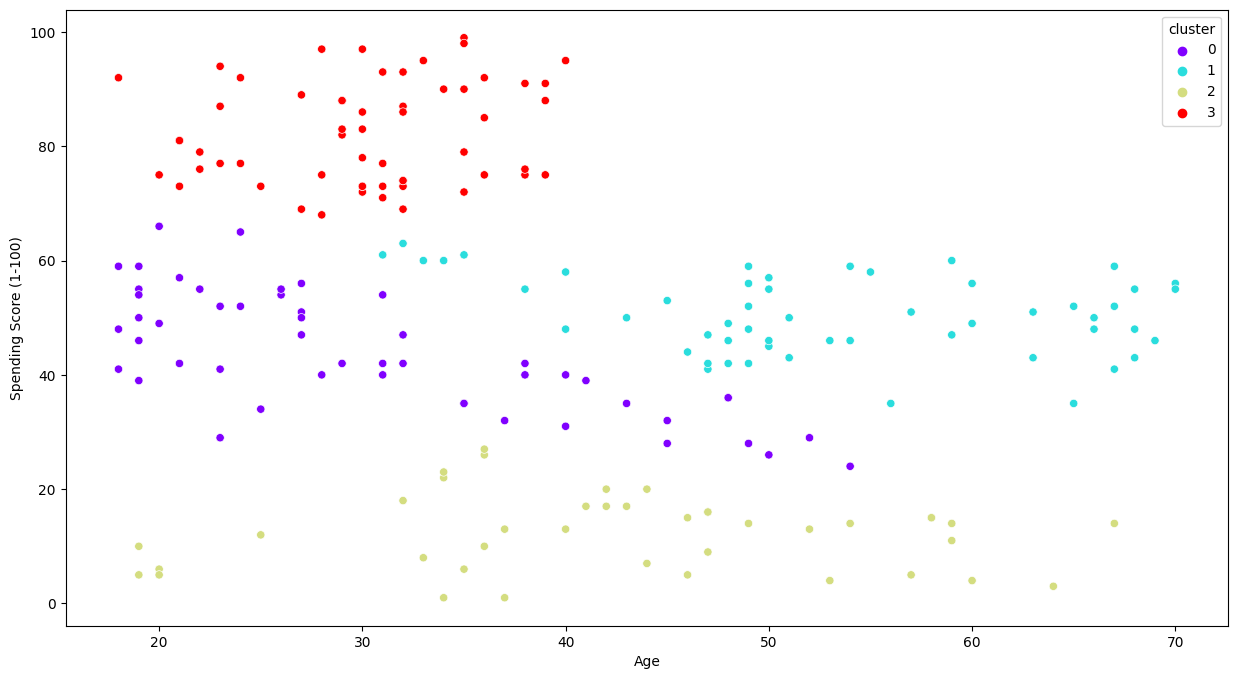

In [35]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=x1, hue='cluster', palette='rainbow')

#### Annual Income and Spending Score- x2

#### Interpretation based on Age and Spending Score- x1

### Conclusion

**cluster 0** : The average age is around 55, both annula_income and spending_scores are on average.
It should be researched what can be done to direct to more spending.

**cluster 1**: The average age is around 45, the annula_income is high but the spending_scores are very low.
This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 2** :The average age is around 30. The annula_income is high and spending_scores are very high.
This group consists of our loyal customers. Our company derives the main profit from this group. Very
special promotions can be made in order not to miss it.    
    
**cluster 3**: The average age is around 25.both annula_income and spending_scores are on average.
It should be researched what can be done to direct to more spending.

#### Interpretation based on Annual Income and Spending Score- x2